In [1]:
#pip install dash-bootstrap-components

  Using cached dash_bootstrap_components-1.2.1-py3-none-any.whl (216 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # Library to help us with plots
from sklearn.preprocessing import MinMaxScaler # Library to help us scale
from sklearn.model_selection import train_test_split # Library to help us split the dataset
from sklearn.ensemble import RandomForestClassifier # Library to enable Random Forest
from sklearn.svm import SVC # Library to enable support vector machine
from sklearn.neighbors import KNeighborsClassifier # Library to enable KNN
from sklearn.tree import DecisionTreeClassifier # Library to enable decision tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score ,roc_curve
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, GridSearchCV
import pickle # Library to help us save the model


RANDOM_SEED = 1331
np.random.seed(RANDOM_SEED)

Authors of the code: Frank Aiwuyor Ogiemwonyi, Rony Ventura, Tara de Groot, Eric Vincent Rivas, Silvia Dubon, Dwi Aji Kurnia Putra, and Laureanne van Dijk 

We based our code on the code from the DSHI and DAMI course

## 1. Import DataFrame

In [2]:
df = pd.read_csv("processed.cleveland.csv",sep=None) # Opening and reading the file of Cleveland
df.head() # View of first 5 rows

C:\Users\rony_\AppData\Local\Temp\ipykernel_14312\1596376414.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("processed.cleveland.csv",sep=None) # Opening and reading the file of Cleveland


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 2. Clean the Dataset

In [3]:
# As Features "CA" and "THAL" are type object lets check what unique values they have 
print(df['ca'].unique()) # Print unique values of "ca"
print(df['thal'].unique()) # Print unique values of "thal"

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


In [4]:
# Missing values are stated with a questionmark, so let's see how many missing values we have
print(" \"?\" values in the dataframe ") # Print the phrase "?" values in the dataframe
print((df == "?").sum(axis=0)) # Finding the number of "?" in each feature (column) and print the sum 

 "?" values in the dataframe 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


#### Delete rows with missing values

In [5]:
# Creating a new df in which the rows with values "?" from the columns "ca" and "thal" are excluded
df = df[(df["ca"] != '?') & (df["thal"] != '?')]
df.dropna(inplace = True) # Deletion of null values
print(" \"?\" values in the dataframe ") # Print the phrase "?" values in the dataframe
# Finding the number of "?" in each feature (column) and showing (printing) the sum of it to verify there are no more "?" values
print((df == "?").sum(axis=0)) 

 "?" values in the dataframe 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [6]:
df = df.reset_index(drop=True) # Reset the index to make sure the index matches the number of entries 

In [7]:
df.shape # Size after deletion of missing values

(297, 14)

## 3. Exploratory Data Analysis (EDA)

#### Check Class labels

In [8]:
df["num"].value_counts() # Count and show the number of values per class label

0    160
1     54
2     35
3     35
4     13
Name: num, dtype: int64

In [9]:
print((df == 0).sum(axis=0)) # Check if vital features have value "0" that could be a mistake

age           0
sex          96
cp            0
trestbps      0
chol          0
fbs         254
restecg     147
thalach       0
exang       200
oldpeak      96
slope         0
ca            0
thal          0
num         160
dtype: int64


Prediction outcome will categorize  healthy or not healthy , therefore class 1,2,3,4 will be considered not healthy and grouped together in one single class


Class 0: Healthy \\
Class 1: Not *healthy*

In [10]:
# Changing values from 1-4 to 1, because 1 means they have a heart disease i.e. not healthy 
df["num"].replace({2: 1, 3: 1, 4:1}, inplace=True) 

In [11]:
df["num"].value_counts() # Count the amount of values for each class label 

0    160
1    137
Name: num, dtype: int64

Comparison of women vs men 

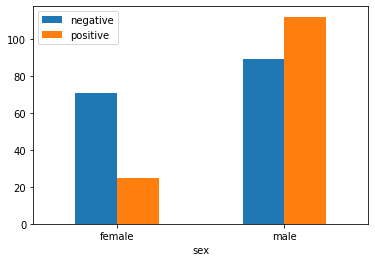

sex  num
0.0  0       71
     1       25
1.0  1      112
     0       89
Name: num, dtype: int64

In [12]:
# We are going to plot the negative and postive values (healty/not healthy) grouped by sex
# This way we can compare the outcome between women and men
ylabels = ['negative', 'positive'] # The labels we use for the y-axis
labels = ("female", "male") # The labels we use for the x-axis

positions = (0, 1)

sex = df.groupby("sex")['num'].value_counts() # We're grouping by sex
ax = sex.unstack().plot(kind='bar',legend=False, rot=0) # Creating the barplot
plt.legend(labels=ylabels) # Create the legend based on who is healthy/not healthy
plt.xticks(positions, labels) # Give the bars their label and position
plt.show() # show the plot
sex # Print the values we see in the plot so we're able to check the exact values

In [13]:
# Show age groups by counting and showing the persons for each age and class
# NaN values in this case mean there is no person in that age group with that class
age_group=df.groupby(["age"])['num'].value_counts() 
age_group.unstack() 

num,0,1
age,,
29.0,1.0,NaN
34.0,2.0,NaN
35.0,2.0,2.0
37.0,2.0,NaN
38.0,NaN,1.0
39.0,3.0,1.0
40.0,1.0,2.0
41.0,9.0,1.0
42.0,7.0,1.0


## 4. Standardization

In [14]:
# Define the columns in which the values are numerical 
numerical = ["age", "trestbps", "chol", "thalach", "oldpeak", "cp"]
X = df[numerical] # Create a dataframe for standardization that only includes the numerical features
# We compared the evaluation metrics of MinMaxScaler() and StandardScaler()
# MinMaxScaler() scored slightly better so we decided to go with MinMaxScaler()
scaler=MinMaxScaler() # Standardize the dataset
df_standard = scaler.fit_transform(X) #fit and transform the data
# Create a dataframe with the standardized values
df_standard = pd.DataFrame(df_standard, columns=numerical) 

In [15]:
# Combine original dataframe with standardized dataset
standardized = df.copy() # Create a copy of the origional dataset
# Replace the numerical features in the original dataframe with the standardized features
standardized[numerical] = df_standard[numerical] 
standardized.head() # Print the first 5 rows of the standardized data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,2.0,0.603053,0.0,0.370968,3.0,0.0,6.0,0
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,2.0,0.282443,1.0,0.241935,2.0,3.0,3.0,1
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,2.0,0.442748,1.0,0.419355,2.0,2.0,7.0,1
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,3.0,0.0,3.0,0
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,2.0,0.770992,0.0,0.225806,1.0,0.0,3.0,0


## 5. Selecting the features

In [16]:
# Create 2 test sets: one with all features and one with selected features
# First we create a dataframe in which all features are included
X_all_features = standardized.copy() # Create a copy of the standardized dataframe
X_all_features.drop(columns=['num'],inplace=True) # Drop the outcome variable
# Create a dataset with only the selected values
X_selection = standardized[['sex', 'chol', 'age', 'fbs', 'trestbps', 'cp']]
X_selection = pd.DataFrame(X_selection) # Converting the X_selection to a dataframe
y = standardized['num'] # We store the classlabels in y

## 6. Splitting in training and test sets

In [17]:
# Split the dataset that includes all features into a training and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X_all_features, y, test_size=0.2, random_state=RANDOM_SEED)
# Split the dataset that includes a selection of features into a training and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X_selection, y, test_size=0.2, random_state=RANDOM_SEED)

In [18]:
# Defining a method to print the size of the test/training set
def size(X_train, X_test, y_train, y_test):
  print("The size of the training set is: ",X_train.shape)
  print("The size of the test set is: ",X_test.shape)
  print("The size of the training target set is: ",y_train.shape)
  print("The size of the test target set is: ",y_test.shape)

In [19]:
# Checking if the train/split sets match with target of the dataset with all features
size(X1_train, X1_test, y1_train, y1_test)

The size of the training set is:  (237, 13)
The size of the test set is:  (60, 13)
The size of the training target set is:  (237,)
The size of the test target set is:  (60,)


In [20]:
# Checking if the train / split  sets match with target of the dataset with the feature selection
size(X2_train, X2_test, y2_train, y2_test)

The size of the training set is:  (237, 6)
The size of the test set is:  (60, 6)
The size of the training target set is:  (237,)
The size of the test target set is:  (60,)


 
#7 Choosing models Random Forest, SVM, KNN, Descision Tree


In [21]:
# Define classifiers to train and test 
MODELS_TO_TEST = {
    "RF_10": RandomForestClassifier(n_estimators=10, max_depth=5),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "DT": DecisionTreeClassifier(max_depth=3),
}

# Define the number of splits 
NUMBER_OF_SPLITS = 5

# Define the scoring metrics
SCORING_METRICS = ["accuracy", "precision_macro", "recall_macro", "f1_macro", "roc_auc"] # Metrics of interest

# Create empty DataFrame to populate the name of the classifier and the six values returned from `cross_validate()`
results_evaluation = pd.DataFrame({
                                    "classifier_name":[],
                                    "fit_time": [],
                                    "score_time": [],
                                    "test_accuracy": [],
                                    "test_precision_macro": [],
                                    "test_recall_macro": [],
                                    "test_f1_macro": [],
                                    "test_roc_auc": [],
                                    })
results_evaluation_selected_features = pd.DataFrame({
                                    "classifier_name":[],
                                    "fit_time": [],
                                    "score_time": [],
                                    "test_accuracy": [],
                                    "test_precision_macro": [],
                                    "test_recall_macro": [],
                                    "test_f1_macro": [],
                                    "test_roc_auc": [],
                                    })

#8. Train, test and evaluation metrics

In [22]:
#### ITERATION FOR THE EXPERIMENT for Dataset with ALL features

for name, classifier in MODELS_TO_TEST.items():
    
    print(f"Currently training the classifier {name}.")

    # Get the evaluation metrics per fold after cross-validation
    # Note that we are passing the normalized array `data_X_norm` to all classifiers
    scores_cv = cross_validate(classifier, X_all_features, y, cv=NUMBER_OF_SPLITS, scoring=SCORING_METRICS)

    # Average the scores among folds
    dict_this_result = {
                    "classifier_name":[name],
                    }
    # Populate the dictionary with the results of the cross-validation
    for metric_name, score_per_fold in scores_cv.items():
        dict_this_result[metric_name] = [ scores_cv[metric_name].mean() ]

    # Generate the results to populate the pandas.DataFrame
    this_result = pd.DataFrame(dict_this_result)

    # Append to the main dataframe with the results 
    results_evaluation = pd.concat([results_evaluation, this_result], ignore_index=True)

print("The experimental setup has finished")

Currently training the classifier RF_10.
Currently training the classifier SVM.
Currently training the classifier KNN.
Currently training the classifier DT.
The experimental setup has finished


In [23]:
# Printing the evaluation metrics of all features
results_evaluation

,classifier_name,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro,test_roc_auc
0,RF_10,0.022767,0.012802,0.831469,0.833624,0.828026,0.829143,0.900062
1,SVM,0.003211,0.009955,0.838136,0.841959,0.834987,0.835907,0.904547
2,KNN,0.003200,0.013802,0.824520,0.825979,0.823247,0.822720,0.880613
3,DT,0.001958,0.009597,0.794520,0.799848,0.791154,0.791589,0.843432


In [24]:
# Store the average accuracy from the all features dataset and group by the name of the classifier
average_score_classifier = results_evaluation.groupby(by=["classifier_name"]).mean()

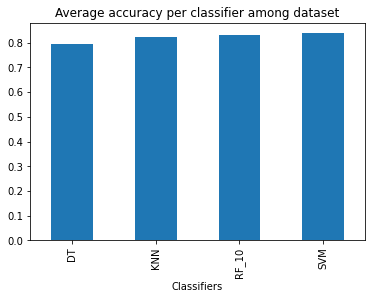

classifier_name
DT       0.794520
KNN      0.824520
RF_10    0.831469
SVM      0.838136
Name: test_accuracy, dtype: float64

In [25]:
average_score_classifier["test_accuracy"].plot.bar() # Plot the the average accuracy from the all features dataset
plt.title("Average accuracy per classifier among dataset") # Set a title for the plot
plt.xlabel("Classifiers") # Set a label for the X-axis
plt.show() # Show the plot
average_score_classifier["test_accuracy"]

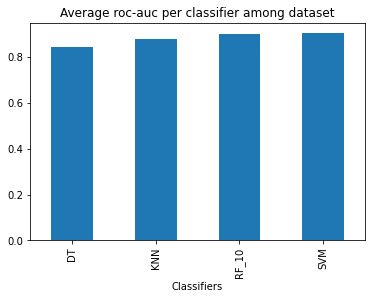

classifier_name
DT       0.843432
KNN      0.880613
RF_10    0.900062
SVM      0.904547
Name: test_roc_auc, dtype: float64

In [26]:
average_score_classifier["test_roc_auc"].plot.bar() # Plot the the average accuracy from the all features dataset
plt.title("Average roc-auc per classifier among dataset") # Set a title for the plot
plt.xlabel("Classifiers") # Set a label for the X-axis
plt.show() # Show the plot
average_score_classifier["test_roc_auc"]

In [27]:
#### ITERATION FOR THE EXPERIMENT for Dataset with selected features

for name, classifier in MODELS_TO_TEST.items():
    
    print(f"Currently training the classifier {name}.")

    # Get the evaluation metrics per fold after cross-validation
    # Note that we are passing the normalized array `data_X_norm` to all classifiers
    scores_cv_selected = cross_validate(classifier, X_selection, y, cv=NUMBER_OF_SPLITS, scoring=SCORING_METRICS)

    # Average the scores among folds
    dict_this_result_selected = {
                    "classifier_name":[name],
                    }
    # Populate the dictionary with the results of the cross-validation
    for metric_name, score_per_fold in scores_cv_selected.items():
        dict_this_result_selected[metric_name] = [ scores_cv_selected[metric_name].mean() ]

    #### Generate the results to populate the pandas.DataFrame
    this_result_selected = pd.DataFrame(dict_this_result_selected)

    # Append to the main dataframe with the results 
    results_evaluation_selected_features = pd.concat([results_evaluation_selected_features, this_result_selected], ignore_index=True)

print("The experimental setup has finished")

Currently training the classifier RF_10.
Currently training the classifier SVM.
Currently training the classifier KNN.
Currently training the classifier DT.
The experimental setup has finished


In [28]:
# Printing the evaluation metrics of the selected features
results_evaluation_selected_features

,classifier_name,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro,test_roc_auc
0,RF_10,0.022392,0.009607,0.754124,0.760095,0.753208,0.750789,0.814497
1,SVM,0.003478,0.012800,0.767853,0.771313,0.767312,0.765699,0.813401
2,KNN,0.003196,0.008005,0.730621,0.734889,0.730308,0.727894,0.789542
3,DT,0.000000,0.009601,0.737288,0.748269,0.743105,0.736642,0.777468


#9. Tune the models for better performance by optimizing the parameters




In [29]:
# Create a standard SVC classifier clf without any parameter
clf = SVC()
# Grid search with a list of two parameter dictionaries, one with kernel = ['poly'] and degree = [2, 3, 4]
# and the other one with kernel = ['linear', 'rbf'] and C = [1, 10, 100, 1000]
param_grid = [
    {'kernel': ['poly'], 'degree': [2, 3, 4]},
    {'kernel': ['linear', 'rbf'], 'C': [1, 10, 100, 1000]},
    ]
# Run GridSearch and save the scores
gs = GridSearchCV(clf, param_grid, cv=5)

In [30]:
# Fit the training data of the dataset with all features
gs.fit(X1_train, y1_train)
# The best classifier
gs.best_estimator_

SVC(kernel='poly')

In [31]:
# The best score
gs.best_score_

0.8185283687943263

#10. Saving the best model

In [32]:
# Predict model with gs (best model)
y1_predicted = gs.predict(X1_test)
print(classification_report(y1_test, y1_predicted))
print(f'model  AUC score: {roc_auc_score(y1_test, y1_predicted)}')

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.87      0.84      0.86        32

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

model  AUC score: 0.8504464285714286


In [33]:
# Method for plotting AUC/ROC curve
def plot_roc_curve(true_y, y_prob): 
    
    fpr, tpr, thresholds = roc_curve(y1_test, y1_predicted)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model  AUC score: 0.8504464285714286


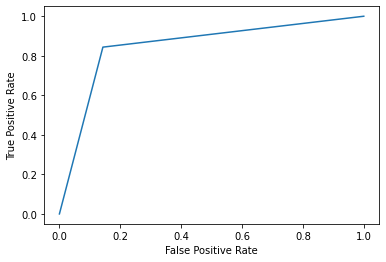

In [34]:
plot_roc_curve(y1_test, y1_predicted) # Plot AUC/ROC curve
print(f'model  AUC score: {roc_auc_score(y1_test, y1_predicted)}')

In [35]:
# Save the trained model into trained_model_cuore.pickle using pickle, without using a folder_path
FOLDER_PATH = ""
trained_model_filename = FOLDER_PATH + "trained_model_cuore.pickle"

In [36]:
# Create file with the specific variable in the specified folder
data_to_save = gs.best_estimator_ 
file_path = trained_model_filename


In [37]:
# Creates a binary object and writes the indicated variables
with open(file_path, "wb") as writeFile:
    pickle.dump(data_to_save, writeFile)

In [38]:
# Here we will load the same model, but in a variable that is completely empty
loaded_model = None

In [39]:
# Load model
with open(trained_model_filename, "rb") as readFile:
    loaded_model = pickle.load(readFile)

In [40]:
Y_predicted_loaded_model = loaded_model.predict(X1_test) # Confirm that the loaded model has the same metrics as the one trained
print(classification_report(y1_test, Y_predicted_loaded_model))
print(f'model  AUC score: {roc_auc_score(y1_test, Y_predicted_loaded_model)}')

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.87      0.84      0.86        32

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

model  AUC score: 0.8504464285714286
